In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### This is a single perceptron model that DOES NOT use PyTorch!

Propagation and optimization functions are the same as slideshow, except our activation function is not a sigmoid but a unit step (so we ignore its derivative).

In [2]:
def forward_propagation(x, y, weights, bias):
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2
    d_loss = 2*(y_pred - y)

    return y_pred, loss, d_loss

In [3]:
def optimize_perceptron(x, y, learning_rate,  maxEpochs, ):
    """
    Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = np.random.rand()

    errors = list()
    epochs = list()

    # Loop until stop conditions are met
    while (epoch <= maxEpochs) and (error > 9e-4):

        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):

            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = backpropagation(x[i], d_loss)

            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))


    return weights, bias, errors

# def optimize_perceptron(x, y, learning_rate, maxEpochs, ):
#     """
#     Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
#     Steps:
#     1. Forward propagate data point
#     2. Backpropagate
#     3. Update weights
#     4. Check stop conditions while looping
#     """
#     epoch = 0
#     error = 999
#     weights = np.random.rand(x.shape[1])  # initialize weights randomly
#     bias = np.random.rand()  # initialize bias randomly

#     errors = list()
#     epochs = list()

#     # Loop until stop conditions are met
#     while (epoch <= maxEpochs) and (error > 9e-4):

#         loss_ = 0
#         # Loop over every data point
#         for i in range(x.shape[0]):

#             # Forward Propagation on each data point
#             y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

#             # Backpropagation
#             partial_derivates = backpropagation(x[i], d_loss)

#             # Learn by updating the weights of the perceptron
#             weights = weights - (learning_rate * np.array(partial_derivates))

#             # Ensure weights remain positive
#             weights = np.clip(weights, 0, None)

#         # Evaluate the results
#         for index, feature_value_test in enumerate(x):
#             y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
#             loss_ += loss

#         errors.append(loss_ / len(x))
#         epochs.append(epoch)
#         error = errors[-1]
#         epoch += 1

#         print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

#     return weights, bias, errors


In [4]:
def activation_function(prediction):
    """
    Receives the output of the perceptron's function as parameter, and applies the
    activation function on it.
    In this simple model, the activation function is a unit step which classifies
    negative inputs as 0 and positive inputs as 1.
    """
    if prediction >= 0.5:
        return 1
    return 0


def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)

    return (prediction)

In [5]:
def backpropagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)

    return partial_derivates

### Formatting our Data

In [6]:
data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# If you want to change either digit, just change the label value to either a 0 or a 1 so the math works out
# Ex. data_zeros = data[data['label'] == 7]
#     data_zeros['label'] = 0

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print(data.shape)
print(np.unique(data['label'].to_numpy()))

# # Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.

(8816, 785)
[0 1]
(6612, 784)
(2204, 784)
(6612,)
(2204,)


In [7]:
def shrinkdata(data, res):
    """
    Reformats the input data at a lower resolution.
    data: Our input data matrix
    res:  The resolution (must be a factor of 28)
    """
    data = data[0:].reshape([data.shape[0], 28, 28])
    data = data.reshape(data.shape[0], res, int(28 / res), res, int(28 / res)).sum(axis=2).sum(axis=3)
    data = data / ((28 / res)**2)
    data = data[0:].reshape(data.shape[0], res**2)
    return data

def shrinkpoint(data, res):
    """
    Same as shrinkdata, but for a single 784 pixel image
    """
    data = data.reshape([28, 28])
    data = data.reshape(res, int(28 / res), res, int(28 / res)).sum(axis=1).sum(axis=2)
    data = data / ((28 / res)**2)
    data = data.reshape(res**2)
    return data

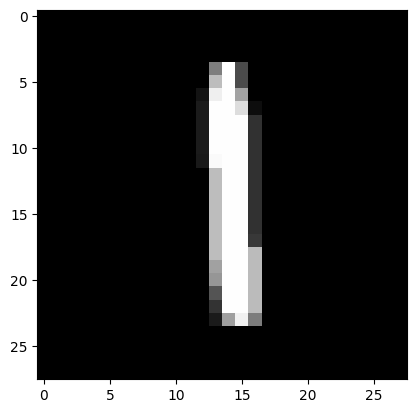

In [8]:
plt.imshow(x_train[205].reshape([28, 28]), cmap='Greys_r')

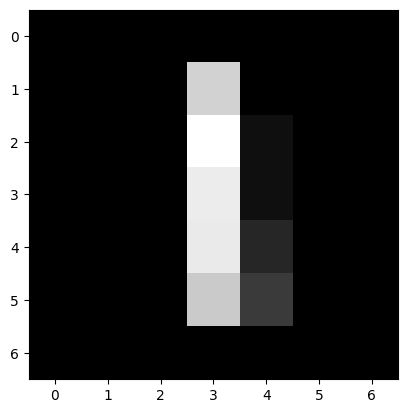

In [9]:
resolution = 7 # 4x4 image resolution
x_train_shrunk = shrinkdata(x_train, resolution)
x_test_shrunk = shrinkdata(x_test, resolution)

plt.imshow(x_train_shrunk[205].reshape([resolution, resolution]), cmap='Greys_r')

In [10]:
def calculate_accuracy(x_test, y_test, weights, bias):

    correct = 0

    for sample, label in zip(x_test, y_test):

        prediction = predict(sample, weights, bias)

        if prediction == label:
            correct += 1

    accuracy = correct / len(x_test)
    return accuracy

In [11]:
weights, bias, errors = optimize_perceptron(x_train_shrunk, y_train, learning_rate = 0.001, maxEpochs = 100)

Epoch 1. loss: 0.12915910465819722
Epoch 2. loss: 0.0911978221415608
Epoch 3. loss: 0.07153660012099214
Epoch 4. loss: 0.062008469449485785
Epoch 5. loss: 0.059437386569872956
Epoch 6. loss: 0.05716878402903811
Epoch 7. loss: 0.055505142165759226
Epoch 8. loss: 0.05369026013309135
Epoch 9. loss: 0.05369026013309135
Epoch 10. loss: 0.052177858439201454
Epoch 11. loss: 0.05127041742286751
Epoch 12. loss: 0.05066545674531155
Epoch 13. loss: 0.05021173623714459
Epoch 14. loss: 0.050060496067755596
Epoch 15. loss: 0.04869933454325469
Epoch 16. loss: 0.04824561403508772
Epoch 17. loss: 0.04764065335753176
Epoch 18. loss: 0.0470356926799758
Epoch 19. loss: 0.04673321234119782
Epoch 20. loss: 0.04658197217180883
Epoch 21. loss: 0.04673321234119782
Epoch 22. loss: 0.046430732002419844
Epoch 23. loss: 0.046430732002419844
Epoch 24. loss: 0.045674531155474894
Epoch 25. loss: 0.04506957047791894
Epoch 26. loss: 0.044615849969751965
Epoch 27. loss: 0.044615849969751965
Epoch 28. loss: 0.04446460980

In [12]:
acc = calculate_accuracy(x_test_shrunk, y_test, weights, bias)
print('Accuracy: ', acc)

Accuracy:  0.9632486388384754


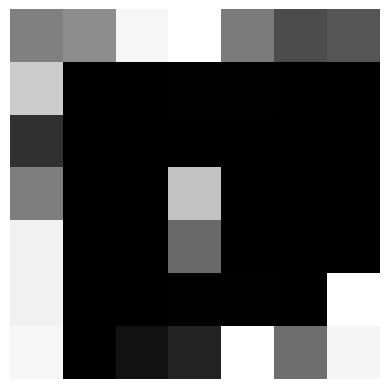

[[3.20621611e-01 3.54929248e-01 6.97548245e-01 7.48796413e-01
  3.04907451e-01 1.78277966e-01 1.97674401e-01]
 [5.23973231e-01 8.42156863e-04 2.26274510e-03 7.18480392e-03
  3.20784314e-03 0.00000000e+00 0.00000000e+00]
 [1.22102927e-01 4.54411765e-04 0.00000000e+00 1.73039216e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.14546719e-01 0.00000000e+00 0.00000000e+00 4.93467817e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.67552106e-01 0.00000000e+00 0.00000000e+00 2.56361836e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.69375380e-01 0.00000000e+00 2.50980392e-04 6.39117647e-03
  3.43725490e-03 1.70588235e-03 7.48536122e-01]
 [6.99912108e-01 2.05294118e-03 4.68815011e-02 9.14068627e-02
  7.54409411e-01 2.70158490e-01 6.89963206e-01]]


In [13]:
weights.resize((resolution, resolution))
plt.imshow(weights, cmap='Greys_r')
plt.axis('off')
plt.show()

print(weights)